In [1]:
#importing necessary libraries
import os
import glob

In [2]:
import glob

path = 'dataset'

image_path_names = []
person_names = set()

for folder_name in glob.glob(path + '/*'):
    for file_name in glob.glob(folder_name + '/*.jpg'):
        image_path_names.append(file_name)
        person_names.add(image_path_names[-1].split('/')[-2])  # Changed split index to -2

print(len(image_path_names))
print(person_names)


1503
{'anshul', 'sudip', 'akshra'}


In [7]:
# downloading the Human face detector from the dlib library
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2024-04-26 11:22:02--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   211KB/s    in 3.2s    

2024-04-26 11:22:06 (211 KB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [8]:
!bzip2 -dk mmod_human_face_detector.dat.bz2

In [9]:
%rm mmod_human_face_detector.dat.bz2

In [3]:
# importing the necessary libraries
import cv2
import matplotlib.pyplot as plt
import dlib

In [4]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [22]:
# Create directory for cropped images
os.makedirs(path + '/Images_crop/', exist_ok=True)

In [23]:
# Create directories for each person
for person in person_names:
    os.makedirs(path + '/Images_crop/' + person + '/', exist_ok=True)

In [26]:
import os

# Initialize counter for total images
total_images = 0

# Initialize counter for processed images
processed_images = 0

# Loop over each person's folder
for person in person_names:
    person_folder = os.path.join(path, person)
    person_images = os.listdir(person_folder)[:100]  # Take only the first 100 images
    total_images += len(person_images)
    
    # Loop over images in the person's folder
    for image_name in person_images:
        # Construct full path to the image
        image_path = os.path.join(person_folder, image_name)
        
        # Processing code...
        img = cv2.imread(image_path)
        rects = dnnFaceDetector(img, 1)

        for (i, rect) in enumerate(rects):
            left = rect.rect.left()
            top = rect.rect.top()
            right = rect.rect.right()
            bottom = rect.rect.bottom()
            
            # Check if face bounding box is valid
            if left >= 0 and top >= 0 and right >= 0 and bottom >= 0:
                # Crop face region
                img_crop = img[top:bottom, left:right]
                
                # Save cropped image
                save_dir = os.path.join(path, 'Images_crop', person)
                os.makedirs(save_dir, exist_ok=True)
                save_path = os.path.join(save_dir, image_name)
                cv2.imwrite(save_path, img_crop)
                print("Cropped image saved:", save_path)
            else:
                print("Error: Invalid face bounding box")
        
        # Increment processed images counter
        processed_images += 1
        
        # Calculate percentage completion for each person's dataset
        percentage = (processed_images / total_images) * 100
        
        # Print progress
        print("Progress for {}: {:.2f}%".format(person, percentage))


Cropped image saved: dataset/Images_crop/sudip/user. Sudip..331.jpg
Progress for sudip: 1.00%
Cropped image saved: dataset/Images_crop/sudip/user. Sudip..148.jpg
Progress for sudip: 2.00%
Cropped image saved: dataset/Images_crop/sudip/user. Sudip..288.jpg
Progress for sudip: 3.00%
Error: Invalid face bounding box
Progress for sudip: 4.00%
Cropped image saved: dataset/Images_crop/sudip/user. Sudip..81.jpg
Progress for sudip: 5.00%
Cropped image saved: dataset/Images_crop/sudip/user. Sudip..347.jpg
Progress for sudip: 6.00%
Cropped image saved: dataset/Images_crop/sudip/user. Sudip..381.jpg
Progress for sudip: 7.00%
Error: Invalid face bounding box
Progress for sudip: 8.00%
Cropped image saved: dataset/Images_crop/sudip/user. Sudip..415.jpg
Progress for sudip: 9.00%
Error: Invalid face bounding box
Progress for sudip: 10.00%
Error: Invalid face bounding box
Progress for sudip: 11.00%
Cropped image saved: dataset/Images_crop/sudip/user. Sudip..217.jpg
Progress for sudip: 12.00%
Error: Inv

In [31]:
import os
import glob
import random

# Initialize counter for total images
total_images = 0

# Initialize counter for processed images
processed_images = 0

# Get the image names for testing
test_image_path_names = []
for person in person_names:
    person_folder = os.path.join(path, person)
    images = os.listdir(person_folder)
    # Randomly select 25 images for testing
    test_images = random.sample(images, min(25, len(images)))
    # Append the file paths to the test_image_path_names list
    test_image_path_names.extend([os.path.join(person_folder, img) for img in test_images])
    total_images += len(images)

# Create the directory for cropped test images
os.makedirs(os.path.join(path, 'Test_Images_crop'), exist_ok=True)

# Detect face, crop face, and save in corresponding folder
for file_name in test_image_path_names:
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    rects = dnnFaceDetector(img, 1)
    
    for (i, rect) in enumerate(rects):
        left = rect.rect.left()  # x1
        top = rect.rect.top()  # y1
        right = rect.rect.right()  # x2
        bottom = rect.rect.bottom()  # y2
        
        # Check if face bounding box is valid
        if left >= 0 and top >= 0 and right >= 0 and bottom >= 0:
            # Crop face region
            img_crop = img[top:bottom, left:right]
            
            # Save cropped image in corresponding folder
            person_name = os.path.basename(person)  # Get the parent folder name (person's name)
            save_dir = os.path.join(path, 'Test_Images_crop', person_name)
            os.makedirs(save_dir, exist_ok=True)
            save_path = os.path.join(save_dir, os.path.basename(file_name))
            cv2.imwrite(save_path, img_crop)
            print("Cropped test image saved:", save_path)
        else:
            print("Error: Invalid face bounding box")
        
    # Increment processed images counter
    processed_images += 1
    
    # Calculate percentage completion for each person's dataset
    percentage = (processed_images / total_images) * 100
    
    # Print progress
    print("Progress for {}: {:.2f}%".format(person, percentage))


Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..102.jpg
Progress for anshul: 0.07%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..283.jpg
Progress for anshul: 0.13%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..324.jpg
Progress for anshul: 0.20%
Error: Invalid face bounding box
Progress for anshul: 0.27%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..19.jpg
Progress for anshul: 0.33%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..272.jpg
Progress for anshul: 0.40%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..191.jpg
Progress for anshul: 0.47%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..66.jpg
Progress for anshul: 0.53%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..287.jpg
Progress for anshul: 0.60%
Cropped test image saved: dataset/Test_Images_crop/anshul/user. Sudip..313.jpg
Progress for an

In [ ]:
len(test_image_path_names)

In [37]:
! pip install gdown


Defaulting to user installation because normal site-packages is not writeable


In [47]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-6tlpofuh
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-6tlpofuh
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8316 sha256=45a1c0a1d3e0f928f0eed9a2b42e3b3c12146899333665b188b3499c6bb410ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-5b1ssvs9/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [48]:
!pip install Keras-Applications

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
! pip install tensorflow==2.0.0

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

2024-04-26 15:53:42.970737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 15:53:42.970907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 15:53:43.360882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 15:53:44.077153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 15:53:51.227077: W tensorflow/compiler/tf2

In [6]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

2024-04-26 15:54:04.516164: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-26 15:54:05.230319: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-26 15:54:05.816358: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-26 15:54:06.002602: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                        

In [8]:

# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [9]:
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras import backend as K
import numpy as np


# Prepare Training Data
x_train = []
y_train = []
person_folders = os.listdir(path+'/Images_crop/')
person_rep = {}

for i, person in enumerate(person_folders):
    person_rep[i] = person
    image_names = os.listdir(path+'/Images_crop/'+person+'/')
    
    for image_name in image_names:
        img = load_img(path+'/Images_crop/'+person+'/'+image_name, target_size=(224, 224))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        img_encode = vgg_face.predict(img)
        x_train.append(np.squeeze(img_encode).tolist())
        y_train.append(i)


1/1 [==============================] - 0s 401ms/step


In [10]:
person_rep

{0: 'akshra', 1: 'sudip', 2: 'anshul'}

In [11]:

x_train=np.array(x_train)
y_train=np.array(y_train)

In [12]:
# Prepare Test Data
x_test = []
y_test = []
person_folders = os.listdir(path + '/Test_Images_crop/')
for i, person in enumerate(person_folders):
    image_names = os.listdir(path + '/Test_Images_crop/' + person + '/')
    for image_name in image_names:
        img = load_img(path + '/Test_Images_crop/' + person + '/' + image_name, target_size=(224, 224))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        img_encode = vgg_face.predict(img)
        x_test.append(np.squeeze(img_encode).tolist())
        y_test.append(i)


1/1 [==============================] - 0s 399ms/step


In [13]:

x_test=np.array(x_test)
y_test=np.array(y_test)

In [14]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [15]:
# Load saved data
import numpy as np
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [16]:

# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [17]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))


x_train shape: (248, 2622)
x_test shape: (65, 2622)


In [18]:
classifier_model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))


Epoch 1/30
8/8 [==============================] - 4s 54ms/step - loss: 0.8634 - accuracy: 0.7298 - val_loss: 1.6479 - val_accuracy: 0.7077
Epoch 2/30
8/8 [==============================] - 0s 20ms/step - loss: 0.4694 - accuracy: 0.9758 - val_loss: 1.5763 - val_accuracy: 0.7077
Epoch 3/30
8/8 [==============================] - 0s 19ms/step - loss: 0.4077 - accuracy: 0.9919 - val_loss: 1.5328 - val_accuracy: 0.7077
Epoch 4/30
8/8 [==============================] - 0s 19ms/step - loss: 0.4124 - accuracy: 0.9839 - val_loss: 1.4961 - val_accuracy: 0.7077
Epoch 5/30
8/8 [==============================] - 0s 19ms/step - loss: 0.3608 - accuracy: 0.9960 - val_loss: 1.4861 - val_accuracy: 0.7231
Epoch 6/30
8/8 [==============================] - 0s 19ms/step - loss: 0.3397 - accuracy: 0.9919 - val_loss: 1.4622 - val_accuracy: 0.8462
Epoch 7/30
8/8 [==============================] - 0s 20ms/step - loss: 0.3022 - accuracy: 0.9960 - val_loss: 1.4129 - val_accuracy: 0.9077
Epoch 8/30
8/8 [===========

In [19]:
# Save model for later use
tf.keras.models.save_model(classifier_model,'face_classifier_model.h5')

/tmp/ipykernel_9390/589379204.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(classifier_model,'face_classifier_model.h5')


In [20]:
# Load saved model
import tensorflow as tf
classifier_model=tf.keras.models.load_model('face_classifier_model.h5')

In [21]:
# Path to folder which contains images to be tested and predicted
test_images_path=path+'/Images_test/'

In [22]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")


In [23]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [24]:
# Label names for class numbers
person_rep={0:'akshra',1:'sudip',2:'anshul'}

In [ ]:
os.mkdir(path+'/Predictions')


Processing image: user. Akshra..66.jpg
Processing image: user. Akshra..182.jpg
1/1 [==============================] - 0s 23ms/step
Predicted name: akshra, Probability: 0.4519117772579193


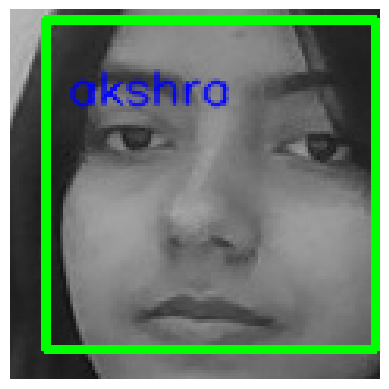

Processing image: user. Akshra..32.jpg
Processing image: user. Akshra..131.jpg
Processing image: user. Akshra..346.jpg
Processing image: user. Akshra..65.jpg
1/1 [==============================] - 0s 22ms/step
Predicted name: akshra, Probability: 0.3710139989852905


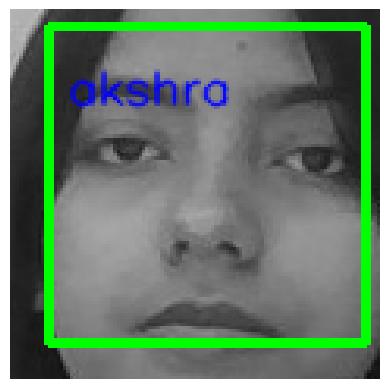

Processing image: user. Akshra..363.jpg
Processing image: user. Akshra..67.jpg
Processing image: user. Akshra..495.jpg
Processing image: user. Akshra..329.jpg
Processing image: user. Akshra..295.jpg
Processing image: user. Akshra..169.jpg
Processing image: user. Akshra..379.jpg
Processing image: user. Akshra..422.jpg
Processing image: user. Akshra..266.jpg
Processing image: user. Akshra..162.jpg
Processing image: user. Akshra..98.jpg
Processing image: user. Akshra..344.jpg
Processing image: user. Akshra..244.jpg
Processing image: user. Sudip..297.jpg
Processing image: user. Sudip..66.jpg
Processing image: user. Sudip..283.jpg
Processing image: user. Sudip..272.jpg
Processing image: user. Sudip..346.jpg
Processing image: user. Sudip..313.jpg
Processing image: user. Sudip..102.jpg
Processing image: user. Sudip..211.jpg
Processing image: user. Sudip..287.jpg
Processing image: user. Sudip..497.jpg
Processing image: user. Sudip..2.jpg
Processing image: user. Sudip..324.jpg
Processing image:

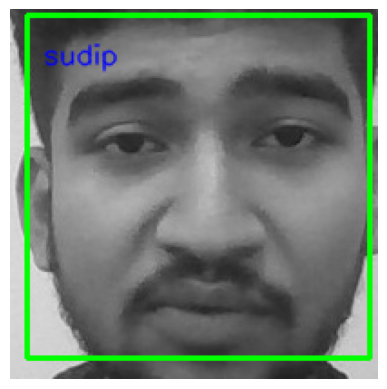

Processing image: user. Anshul..153.jpg
Processing image: user. Anshul..166.jpg
Processing image: user. Anshul..247.jpg
Processing image: user. Anshul..15.jpg
Processing image: user. Anshul..364.jpg
Processing image: user. Anshul..442.jpg
Processing image: user. Anshul..312.jpg
Processing image: user. Anshul..495.jpg
Processing image: user. Anshul..184.jpg
Processing image: user. Anshul..326.jpg
Processing image: user. Anshul..414.jpg
Processing image: user. Anshul..191.jpg
Processing image: user. Anshul..463.jpg
Processing image: user. Anshul..120.jpg
Processing image: user. Anshul..242.jpg
Processing image: user. Anshul..296.jpg
Processing image: user. Anshul..486.jpg
Processing image: user. Anshul..99.jpg
Processing image: user. Anshul..71.jpg
Processing image: user. Anshul..16.jpg
Processing image: user. Anshul..299.jpg
Processing image: user. Anshul..185.jpg
Processing image: user. Anshul..103.jpg
1/1 [==============================] - 0s 28ms/step
Predicted name: anshul, Probabil

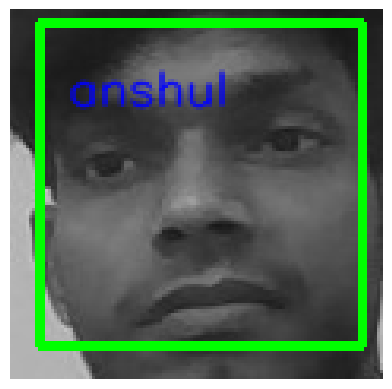

Processing image: user. Anshul..350.jpg
Processing image: user. Anshul..426.jpg


In [43]:
import matplotlib.pyplot as plt

# Path to your folder
path = 'dataset/Test_Images_crop'

# Load the pre-trained Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

for class_name in os.listdir(path):
    class_path = os.path.join(path, class_name)
    
    for img_name in os.listdir(class_path):
        if not img_name.endswith('.jpg'):
            continue
        
        print(f"Processing image: {img_name}")
        
        # Load Image
        img = cv2.imread(os.path.join(class_path, img_name))
        
        # Detect Faces
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        
        if len(faces) > 0:
            # Extract the first face found
            (x, y, w, h) = faces[0]
            
            # Extract Face
            face_img = img[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (224, 224))
            face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            
            # Preprocess and Encode Face
            face_img = np.expand_dims(face_img, axis=0)
            face_img = preprocess_input(face_img)
            img_encode = vgg_face.predict(face_img)

            # Make Predictions
            embed = img_encode
            person = classifier_model.predict(embed)
            name = person_rep[np.argmax(person)]
            probability = np.max(person)
            
            print(f"Predicted name: {name}, Probability: {probability}")
            
            # Draw Bounding Box and Text
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, f'{name} ({probability:.2f})', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 1, cv2.LINE_AA)
            cv2.putText(img, f' {class_name}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
            
            # Display the annotated image
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
            
            # Save the image with annotations
            cv2.imwrite(os.path.join('Predictions', f'{class_name}_{img_name}'), img)


In [44]:
upload_your_image_path_names=[]
for file_name in glob.glob(path+'/Upload_your_images/*.jp*g'):
  upload_your_image_path_names.append(file_name)

In [45]:
os.mkdir(path+'/Upload_your_images_crop/')

In [46]:
for file_name in upload_your_image_path_names:
  img=cv2.imread(file_name)
  #print(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  #print(img_crop)
  img_path=path+'/Upload_your_Images_crop/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

In [47]:
upload_your_images_path=path+'/Upload_your_images/'

In [48]:
os.mkdir(path+'/Your_Predictions')

**Testing with every person in a single frame**

In [ ]:
for img_name in os.listdir('Upload_your_images/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread(path+'/Upload_your_images/'+img_name)
 # print(img_name)
  #print(img)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/Upload_your_images/crop_img.jpg',img_crop)
    
    # Get Embeddings
    crop_img=load_img(path+'/Upload_your_images/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # Make Predictions
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/Upload_your_images/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/Your_Predictions/'+img_name,img)
  plot(img)